### Create a Time Series Model to predict the future air passenger traffic

In [164]:
# importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [165]:
## loading the data
df = pd.read_csv('AirPassengers.csv')
# we have data of airline passengers travelled between January 1949 and December 1960                 

In [166]:
# Checking first 5 rows
df.head(5)

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [167]:
# Checking last 5 rows
df.tail(5)

Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

In [168]:
df.info() #info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Month is actually given as string here. It must be in date-time format

In [170]:
## parse_dates: parsing the date (Converts the string representation of a date to Date object)
# index_col: using date column as index
df = pd.read_csv('AirPassengers.csv', parse_dates=[0], index_col='Month')
# parse_date is t convert date type, here date is string 
# wea are substituting index column with month as we dont need index number

In [171]:
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

# Basic Checks:

In [173]:
df.rename(columns={'#Passengers' : 'Passengers'}, inplace=True) # replacing column name as dictionary, old-value as key & new-value as value

In [174]:
df['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [175]:
df.describe() ##used to view some basic statistical details like percentile, mean, std etc.

Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

# EDA

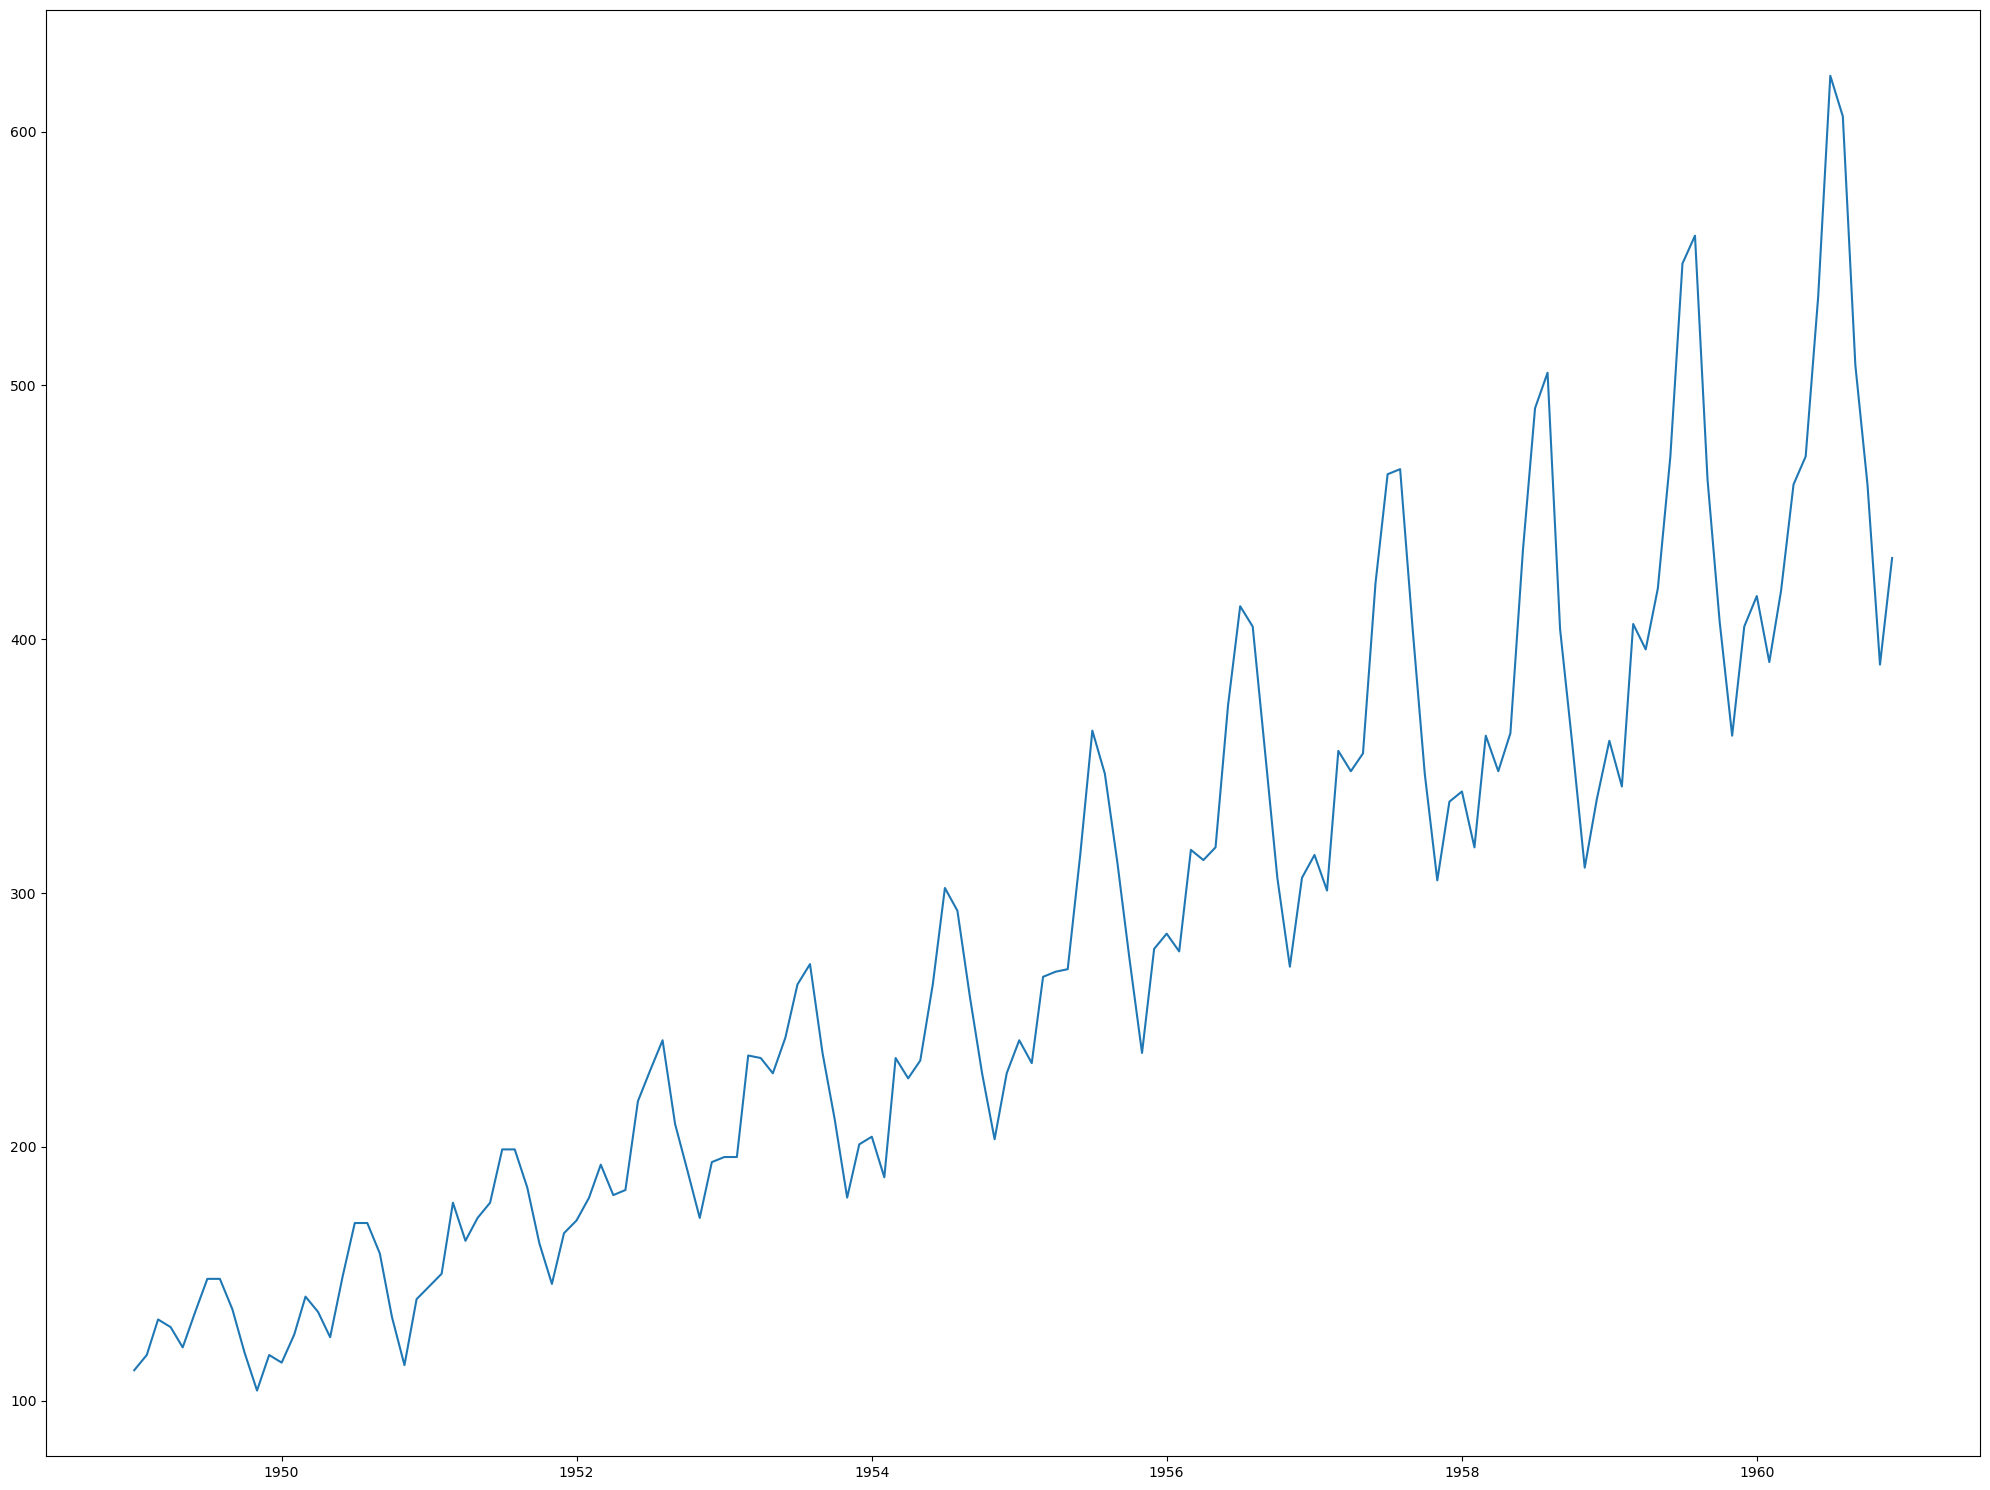

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15), facecolor='white')#canvas  size
plt.plot(df) #line plot
plt.tight_layout()

In [178]:
# Insights:
## from plot we can see the series given is not stationary
## We can see both seasonality both pick and low, and also the upward trend

## Stationarity

* Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
* Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

* Constant mean
* Constant variance
* Constant covariance between periods of identical distance

* All it states is that the covariance between time periods of identical lengths (let’s say 10 days/hours/minutes) should be identical to the covariance of some other period of the same length:

![image-2.png](attachment:image-2.png)



**Why do we need Stationarity?**
- Stationary processes are easier to analyze
- Stationarity is assumed by most of the algorithms
- It is essential to remove any trend or seasonality before modeling the time series data because if the statistical properties do not change over time, it is easier to model the data accurately. One of the popular ways of making the series stationary is differencing.

**How to check if given series is stationary or not:**
- One way is to check autocorrelation.
- Autocorrelation is the similarity between observations as a function of the time lag between them.

* When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series, while for non-stationary data the degradation will happen more slowly.

### Plotting the autocorrelation function

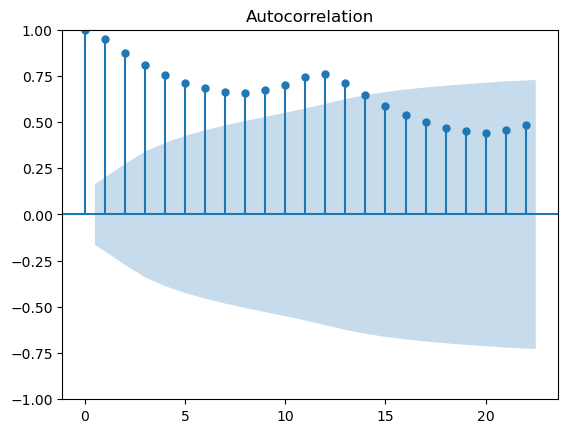

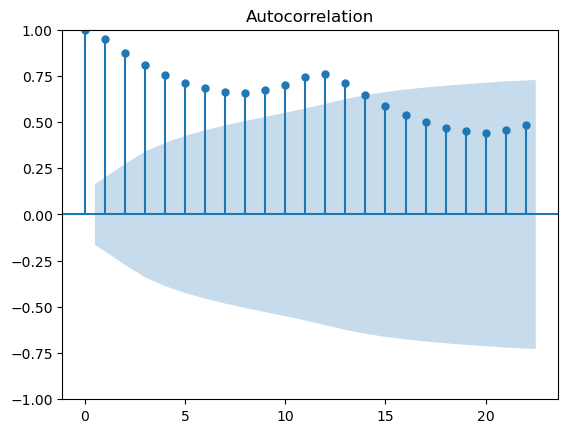

In [187]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [188]:
# From the autocorrelation plot, it is clear that given series is not stationary.

We can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary

In [190]:
dftest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [191]:
dftest[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [192]:
dftest[4].items() # to get the items of a dictionary, for every item there are key & value

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [193]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.Passengers, autolag='AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")

for key,val in dftest[4].items():
    print('\t' ,key, ':', val)

1. ADF :  0.8153688792060597
2. P-Value :  0.9918802434376411
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary.

In [195]:
## making it stationary by taking difference of 1:
df1 = df.diff(periods=1)  #This means calculating the change in your row(s)/column(s) over a set number of periods.
# Or simply, pandas diff will subtract 1 cell value from another cell value within the same index.

In [196]:
df

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

In [197]:
df1 # Series integrated to the order of 1

Passengers
Month                 
1949-01-01         NaN
1949-02-01         6.0
1949-03-01        14.0
1949-04-01        -3.0
1949-05-01        -8.0
...                ...
1960-08-01       -16.0
1960-09-01       -98.0
1960-10-01       -47.0
1960-11-01       -71.0
1960-12-01        42.0

[144 rows x 1 columns]

In [198]:
df1 = df1.iloc[1:] #null value discarded
df1

Passengers
Month                 
1949-02-01         6.0
1949-03-01        14.0
1949-04-01        -3.0
1949-05-01        -8.0
1949-06-01        14.0
...                ...
1960-08-01       -16.0
1960-09-01       -98.0
1960-10-01       -47.0
1960-11-01       -71.0
1960-12-01        42.0

[143 rows x 1 columns]

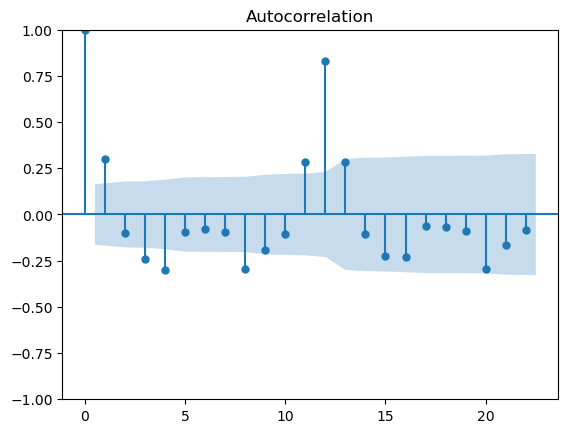

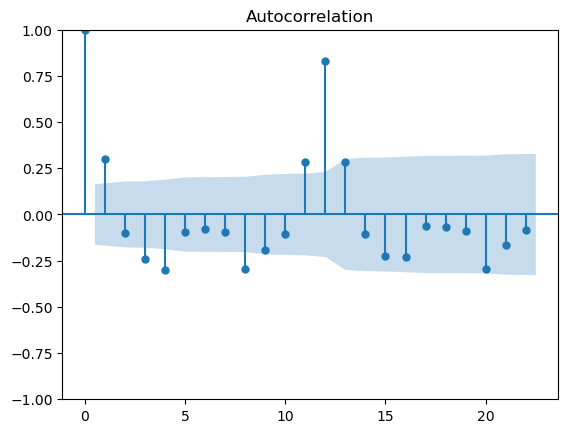

In [199]:
plot_acf(df1) # autocorrelation plot

In [200]:
df2 = df1.diff(periods=1)  # differencing applied to df1

In [201]:
df2.head()

Passengers
Month                 
1949-02-01         NaN
1949-03-01         8.0
1949-04-01       -17.0
1949-05-01        -5.0
1949-06-01        22.0

In [202]:
df2 = df2.iloc[1:]
df2

Passengers
Month                 
1949-03-01         8.0
1949-04-01       -17.0
1949-05-01        -5.0
1949-06-01        22.0
1949-07-01        -1.0
...                ...
1960-08-01      -103.0
1960-09-01       -82.0
1960-10-01        51.0
1960-11-01       -24.0
1960-12-01       113.0

[142 rows x 1 columns]

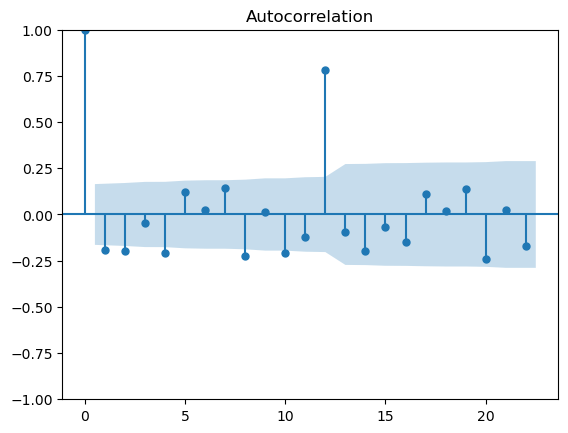

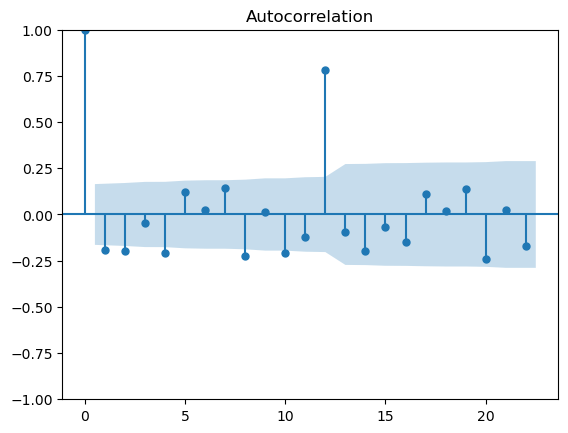

In [203]:
plot_acf(df2)

In [204]:
df2.shape#shape of the data rows and columns

(142, 1)

In [205]:
## Creating training and test sets
train = df2[:100] #from 0th row to 99th row - traning data
test = df2[100:] #from 100th row to end - testing data

In [206]:
train.info() #info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


## Applying autoregressive model

In [208]:
## importing AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [209]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(df2, maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Model creation

In [211]:
ar_model = AutoReg(train, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) ## object creation with lags specified

ar_model_fit = ar_model.fit() # Training the model

In [212]:
prediction = ar_model_fit.predict(start=100,end=141)

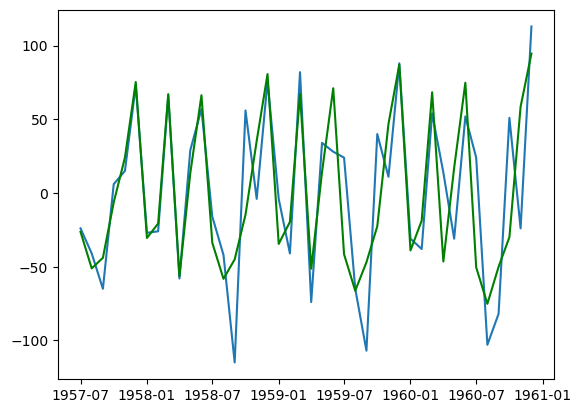

In [213]:
import matplotlib.pyplot as plt

#graph of test vs prediction:
plt.plot(test) # default color is blue
plt.plot(prediction, color='green')

In [214]:
# Insights: we can see that, whereever there is dips, the prediction seems not to be that good to predict the dips

In [215]:
from sklearn.metrics import r2_score

r2_score(test,prediction)

0.5608223318244754

## ARIMA Model

In [217]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [218]:
##Model object creation and fitting the model

model_arima = ARIMA(df2, order=(2,2,3)) # order p,d,q here p-autoregression, d-difference, q-moving average
model_arima_fit = model_arima.fit()  #training

####  Akaike Information Criterion (AIC)
__model_arima_fit.llf:__ This attribute of the fitted ARIMA model object (model_arima_fit) contains the Log-Likelihood value. The Log-Likelihood measures how well the model explains the observed data.
* formula >>>         __AIC=−2⋅log-likelihood+2⋅k__

* __Lower AIC Values:__ Indicate a better model fit, with a balance between model fit and complexity. Lower AIC values suggest that the model is relatively simple and provides a good fit to the data.

In [220]:
log_likelihood = model_arima_fit.llf # llf- log of likelihood
print(log_likelihood) # Print likelihood value

-718.3052183191007


In [221]:
len(model_arima_fit.params) # value of K

6

In [222]:
# Putting the values into formula:
-2*-718.3052183191007+2*2

1440.6104366382015

In [223]:
## evaluate the model: same thing with AIC 
print(model_arima_fit.aic)

1448.6104366382015


## Predicting:

In [225]:
# predicting the output of sample points:
predictions = model_arima_fit.forecast(steps=10) # steps-> how many time span I want to predict, here 10 months
predictions

1961-01-01     3.614346
1961-02-01   -30.744258
1961-03-01    35.530001
1961-04-01   -31.602482
1961-05-01    29.288843
1961-06-01   -23.688940
1961-07-01    22.326794
1961-08-01   -17.091527
1961-09-01    17.045973
1961-10-01   -12.095809
Freq: MS, Name: predicted_mean, dtype: float64

### Plotting prediction in a graph:

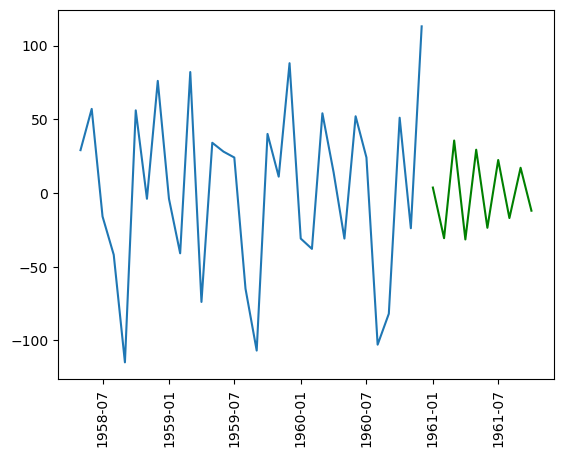

In [227]:
plt.plot(df2[110:])
plt.plot(predictions,color='green')
plt.xticks(rotation=90)
plt.show()

### Geeting the optimal values of p,q an d

In [337]:
import itertools

p = d = q = range(0,5) #values of p,d,q range from 0 to 4
pdq = list(itertools.product(p,d,q)) # is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [230]:
from tqdm import tqdm # taqaddum -> it shows how much code is left to be executed in a percentage form 
import numpy as np 

In [339]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in tqdm(pdq): #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

  2%|█▉                                                                                | 3/125 [00:00<00:05, 23.59it/s]

(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.437281104524
(0, 0, 2) 925.7296649727846
(0, 0, 3) 920.9009365473141


  7%|█████▉                                                                            | 9/125 [00:00<00:06, 18.14it/s]

(0, 0, 4) 912.6569341324866
(0, 1, 0) 1046.7319001420174
(0, 1, 1) 963.8739387623483
(0, 1, 2) 933.2131827620915
(0, 1, 3) 926.5735395693297


 11%|█████████                                                                        | 14/125 [00:00<00:06, 17.58it/s]

(0, 1, 4) 924.3111832552861
(0, 2, 0) 1143.9983209811053
(0, 2, 1) 1043.7570583844451
(0, 2, 2) 966.1633563828659
(0, 2, 3) 941.6116039858562


 15%|████████████▎                                                                    | 19/125 [00:01<00:06, 17.64it/s]

(0, 2, 4) 933.7565624641593
(0, 3, 0) 1247.2070979580242
(0, 3, 1) 1139.8659459337032
(0, 3, 2) 1044.6471545766237
(0, 3, 3) 972.3660666548363


 18%|██████████████▎                                                                  | 22/125 [00:01<00:05, 19.62it/s]

(0, 3, 4) 956.2457318185335
(0, 4, 0) 1351.0676098839504
(0, 4, 1) 1241.6050826097264
(0, 4, 2) 1139.202341246284


 20%|████████████████▏                                                                | 25/125 [00:01<00:06, 14.29it/s]

(0, 4, 3) 1048.6626862370113
(0, 4, 4) 987.4575064086297
(1, 0, 0) 963.0127961447531
(1, 0, 1) 928.7077562630661


 22%|██████████████████▏                                                              | 28/125 [00:01<00:06, 15.48it/s]

(1, 0, 2) 919.8685334934682
(1, 0, 3) 921.8388197018996


 26%|█████████████████████▍                                                           | 33/125 [00:02<00:06, 15.25it/s]

(1, 0, 4) 923.3886062554853
(1, 1, 0) 1021.0396389673776
(1, 1, 1) 959.4979676508102
(1, 1, 2) 962.9514176542339


 28%|██████████████████████▋                                                          | 35/125 [00:02<00:07, 11.96it/s]

(1, 1, 3) 923.2263305240535
(1, 1, 4) 923.1008587326681
(1, 2, 0) 1098.8738469115458


 30%|████████████████████████▌                                                        | 38/125 [00:02<00:06, 13.34it/s]

(1, 2, 1) 1019.1218015515585
(1, 2, 2) 962.4933895441826


 32%|█████████████████████████▉                                                       | 40/125 [00:02<00:07, 11.66it/s]

(1, 2, 3) 965.1462550357375
(1, 2, 4) 931.24062391781
(1, 3, 0) 1186.5053670162433
(1, 3, 1) 1096.1395155121863


 34%|███████████████████████████▊                                                     | 43/125 [00:02<00:05, 14.38it/s]

(1, 3, 2) 1021.3161899084123
(1, 3, 3) 1048.5093741956705


 38%|███████████████████████████████                                                  | 48/125 [00:03<00:05, 13.41it/s]

(1, 3, 4) 971.2002381164964
(1, 4, 0) 1279.6340971680033
(1, 4, 1) 1182.4415145945297
(1, 4, 2) 1096.90765525705
(1, 4, 3) 1141.7606733864636


 40%|████████████████████████████████▍                                                | 50/125 [00:03<00:07,  9.41it/s]

(1, 4, 4) 1050.0994538458372
(2, 0, 0) 951.2134496277077
(2, 0, 1) 926.7745524271561


 42%|██████████████████████████████████▎                                              | 53/125 [00:03<00:06, 10.56it/s]

(2, 0, 2) 921.8448957881609
(2, 0, 3) 923.4339327750605


 46%|█████████████████████████████████████▌                                           | 58/125 [00:04<00:05, 11.74it/s]

(2, 0, 4) 907.3464159757068
(2, 1, 0) 987.8554910217114
(2, 1, 1) 948.4595247235333
(2, 1, 2) 948.2072907514346


 48%|██████████████████████████████████████▉                                          | 60/125 [00:04<00:06,  9.94it/s]

(2, 1, 3) 924.3432898382674
(2, 1, 4) 920.4699557644103


 50%|████████████████████████████████████████▊                                        | 63/125 [00:04<00:05, 11.06it/s]

(2, 2, 0) 1042.434133112731
(2, 2, 1) 987.1969170574888
(2, 2, 2) 952.5019203229128


 52%|██████████████████████████████████████████                                       | 65/125 [00:05<00:06,  9.00it/s]

(2, 2, 3) 955.5752032776508
(2, 2, 4) 961.3103421903978
(2, 3, 0) 1112.0638834740082
(2, 3, 1) 1041.3775809531194


 54%|████████████████████████████████████████████                                     | 68/125 [00:05<00:05, 10.11it/s]

(2, 3, 2) 991.0083401641742
(2, 3, 3) 960.9214433704757


 56%|█████████████████████████████████████████████▎                                   | 70/125 [00:05<00:06,  8.02it/s]

(2, 3, 4) 963.0557364399348
(2, 4, 0) 1192.610973120025
(2, 4, 1) 1109.8713349995742


 58%|███████████████████████████████████████████████▎                                 | 73/125 [00:06<00:05,  8.93it/s]

(2, 4, 2) 1044.126380609448


 60%|████████████████████████████████████████████████▌                                | 75/125 [00:06<00:06,  7.39it/s]

(2, 4, 3) 998.3857542528092
(2, 4, 4) 1017.8946016775636


 62%|█████████████████████████████████████████████████▉                               | 77/125 [00:06<00:05,  9.15it/s]

(3, 0, 0) 953.1213128115827
(3, 0, 1) 928.7783158611319
(3, 0, 2) 923.5861503647459


 64%|███████████████████████████████████████████████████▊                             | 80/125 [00:07<00:05,  7.67it/s]

(3, 0, 3) 925.4068400387533
(3, 0, 4) 908.9409569657273


 66%|█████████████████████████████████████████████████████▊                           | 83/125 [00:07<00:04, 10.37it/s]

(3, 1, 0) 988.1270457402808
(3, 1, 1) 950.4173558497768
(3, 1, 2) 947.4292748094795


 68%|███████████████████████████████████████████████████████                          | 85/125 [00:07<00:04,  8.54it/s]

(3, 1, 3) 925.6993668543371
(3, 1, 4) 917.3601313477184
(3, 2, 0) 1035.9653947027768


 70%|█████████████████████████████████████████████████████████                        | 88/125 [00:07<00:03, 10.71it/s]

(3, 2, 1) 987.7213009078354
(3, 2, 2) 988.3429756431422
(3, 2, 3) 951.6950334641109


 72%|██████████████████████████████████████████████████████████▎                      | 90/125 [00:08<00:04,  7.70it/s]

(3, 2, 4) 956.1129932900245
(3, 3, 0) 1092.040329146795
(3, 3, 1) 1035.4895473745034


 74%|████████████████████████████████████████████████████████████▎                    | 93/125 [00:08<00:03,  8.72it/s]

(3, 3, 2) 991.8396823185212
(3, 3, 3) 992.1825634272142


 78%|██████████████████████████████████████████████████████████████▊                  | 97/125 [00:09<00:03,  7.40it/s]

(3, 3, 4) 960.0206344949615
(3, 4, 0) 1157.4666167735704
(3, 4, 1) 1090.8329361651945


 79%|████████████████████████████████████████████████████████████████▏                | 99/125 [00:09<00:03,  6.70it/s]

(3, 4, 2) 1038.9356877711505
(3, 4, 3) 1046.4816496915726


 82%|█████████████████████████████████████████████████████████████████▎              | 102/125 [00:09<00:02,  7.91it/s]

(3, 4, 4) 999.4166902562126
(4, 0, 0) 938.2795905977569
(4, 0, 1) 918.2879117889652


 83%|██████████████████████████████████████████████████████████████████▌             | 104/125 [00:10<00:03,  6.57it/s]

(4, 0, 2) 919.706950379908
(4, 0, 3) 904.9117988165873


 86%|████████████████████████████████████████████████████████████████████▍           | 107/125 [00:10<00:02,  8.31it/s]

(4, 0, 4) 906.8299743561922
(4, 1, 0) 975.769485387188
(4, 1, 1) 936.4163375318766
(4, 1, 2) 920.9188158918811


 87%|█████████████████████████████████████████████████████████████████████▊          | 109/125 [00:11<00:02,  6.04it/s]

(4, 1, 3) 924.7189710518969


 90%|███████████████████████████████████████████████████████████████████████▋        | 112/125 [00:11<00:01,  7.61it/s]

(4, 1, 4) 920.243375517716
(4, 2, 0) 1026.5680206707796
(4, 2, 1) 976.1403584515361


 91%|████████████████████████████████████████████████████████████████████████▉       | 114/125 [00:11<00:01,  6.47it/s]

(4, 2, 2) 941.5076690116175
(4, 2, 3) 979.4381438746414


 94%|██████████████████████████████████████████████████████████████████████████▉     | 117/125 [00:12<00:01,  7.13it/s]

(4, 2, 4) 961.0302417402181
(4, 3, 0) 1078.605739953936
(4, 3, 1) 1026.7742645236408


 95%|████████████████████████████████████████████████████████████████████████████▏   | 119/125 [00:12<00:00,  6.22it/s]

(4, 3, 2) 981.3202808432795
(4, 3, 3) 1028.379960516405


 98%|██████████████████████████████████████████████████████████████████████████████  | 122/125 [00:12<00:00,  7.09it/s]

(4, 3, 4) 986.7114769439577
(4, 4, 0) 1132.8807846683894
(4, 4, 1) 1078.2001450524094


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 123/125 [00:13<00:00,  6.47it/s]

(4, 4, 2) 1030.9289801954246


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:13<00:00,  9.20it/s]

(4, 4, 3) 1037.2404599796455
(4, 4, 4) 999.1191048188862


In [289]:
list2

[967.9135518309452,
 931.437281104524,
 925.7296649727846,
 920.9009365473141,
 1046.7319001420174,
 963.8739387623483,
 933.2131827620915,
 926.5735395693297,
 1143.9983209811053,
 1043.7570583844451,
 966.1633563828659,
 941.6116039858562,
 1247.2070979580242,
 1139.8659459337032,
 1044.6471545766237,
 972.3660666548363,
 963.0127961447531,
 928.7077562630661,
 919.8685334934682,
 921.8388197018996,
 1021.0396389673776,
 959.4979676508102,
 962.9514176542339,
 923.2263305240535,
 1098.8738469115458,
 1019.1218015515585,
 962.4933895441826,
 965.1462550357375,
 1186.5053670162433,
 1096.1395155121863,
 1021.3161899084123,
 1048.5093741956705,
 951.2134496277077,
 926.7745524271561,
 921.8448957881609,
 923.4339327750605,
 987.8554910217114,
 948.4595247235333,
 948.2072907514346,
 924.3432898382674,
 1042.434133112731,
 987.1969170574888,
 952.5019203229128,
 955.5752032776508,
 1112.0638834740082,
 1041.3775809531194,
 991.0083401641742,
 960.9214433704757,
 953.1213128115827,
 928.7

In [340]:
# Getting the minimum k value from the list
np.min(list2) # minimum value for AIC

904.9117988165873

In [343]:
np.argmin(list2) # It is going to give the minimum value's index number

103

In [345]:
# Getting pdq value for mimimum AIC:
list1[103]

(4, 0, 3)

## create the final model with lowest aic score parameter

In [347]:
model_arima = ARIMA(train, order=(4, 0, 3))
model_arima_fit = model_arima.fit() #training

In [349]:
print(model_arima_fit.aic) # confirm aic score

904.9117988165873


## Forecasting:

In [351]:
forecast = model_arima_fit.forecast(steps=42)
len(forecast)

42

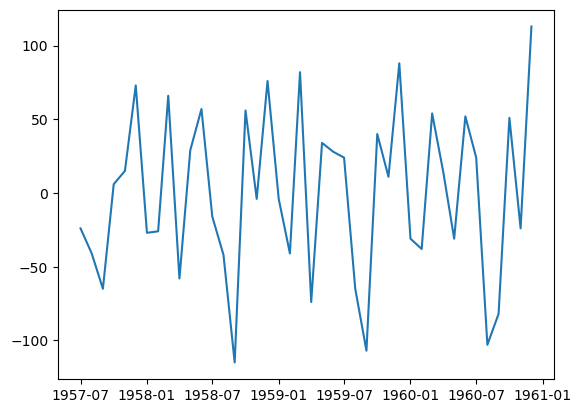

In [353]:
plt.plot(test)

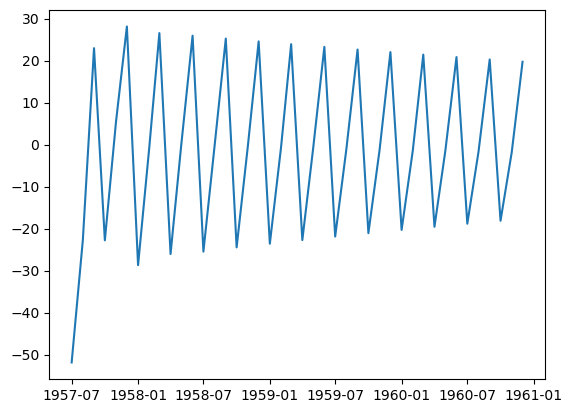

In [355]:
plt.plot(forecast)

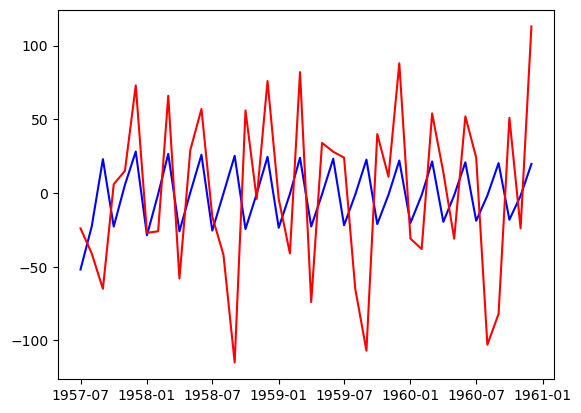

In [357]:
plt.plot(forecast,color='blue')
plt.plot(test,color='red')

In [313]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [365]:
print(root_mean_squared_error(test, forecast))

55.61734609480333


In [359]:
mean_squared_error(test, forecast)

3093.2891866291357

In [361]:
r2_score(test,forecast)

0.03070839901393363

In [367]:
# We can improve this model by changing range from (0,4) to (0,5) or other ranges